In [ ]:
###TODO###

### NAME OF NOTEBOOK TO TAKE THE CODE FROM: NPC48h_vs_mESC_H3K79me2



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
import matplotlib
import matplotlib.cm as cm
from matplotlib import colors
from sklearn.linear_model import LinearRegression
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [14]:
exp_NPC = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
exp_ESC = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")

In [55]:
tr = pd.read_csv("../../figure_1-2/INPUT_DATA/3kb_DownTSS_ProteinCoding.bed",sep="\t",header=None, names=["chr","start","end","gene_ID","score","strand","gene_name","length"])
tr = tr.loc[[i in list([str(i) for i in range(20)])+["X","Y"] for i in tr.chr]]
tr["coord_ID"] = ['{}_{}_{}'.format(tr["chr"][i],tr["start"][i],tr["end"][i]) for i in tr.index]
tr.index = tr["gene_ID"]

tr_ = tr.copy()
tr_.index = tr_["coord_ID"]
tr_ = tr_["gene_ID"].to_dict()
tr_

{'1_3668498_3671498': 'ENSMUSG00000051951.5',
 '1_4406241_4409241': 'ENSMUSG00000025900.12',
 '1_4494354_4497354': 'ENSMUSG00000025902.13',
 '1_4782739_4785739': 'ENSMUSG00000033845.13',
 '1_4807788_4810788': 'ENSMUSG00000025903.14',
 '1_4807892_4810892': 'ENSMUSG00000104217.1',
 '1_4857814_4860814': 'ENSMUSG00000033813.15',
 '1_5067285_5070285': 'ENSMUSG00000002459.17',
 '1_5070018_5073018': 'ENSMUSG00000033793.12',
 '1_5588466_5591466': 'ENSMUSG00000025905.13',
 '1_5914398_5917398': 'ENSMUSG00000033774.4',
 '1_6206197_6209197': 'ENSMUSG00000025907.14',
 '1_6359218_6362218': 'ENSMUSG00000087247.3',
 '1_6487231_6490231': 'ENSMUSG00000033740.17',
 '1_7088920_7091920': 'ENSMUSG00000051285.17',
 '1_9296878_9299878': 'ENSMUSG00000025909.16',
 '1_9545408_9547455': 'ENSMUSG00000061024.8',
 '1_9547948_9550948': 'ENSMUSG00000025911.14',
 '1_9601199_9604199': 'ENSMUSG00000067879.3',
 '1_9697209_9700209': 'ENSMUSG00000025912.16',
 '1_9745382_9748382': 'ENSMUSG00000045210.8',
 '1_9798107_9801107'

In [30]:
df = pd.read_csv("../INTERMEDIATE_FILES/H3K79me2_NPC48h_vs_mESC.counts", sep="\t")
list_of_cols = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15]]
counts_sumRep = rel.preprocess_deeptools(df,merge_rep=True, list_of_columns=list_of_cols)
counts_sumRep.columns = ["mESC_DMSO","mESC_EPZ","NPC48h_DMSO","NPC48h_EPZ","mESC_DMSO_inp","mESC_EPZ_inp","NPC48h_DMSO_inp","NPC48h_EPZ_inp"]
counts_sumRep.index = [tr_[i] if i in tr_ else i for i in counts_sumRep.index]

cT_inp = rel.Normalize_T(counts_sumRep, log=True, input_norm=True)
cT_inp.columns = ["mESC_DMSO","mESC_EPZ","NPC48h_DMSO","NPC48h_EPZ","mESC_DMSO_inp","mESC_EPZ_inp","NPC48h_DMSO_inp","NPC48h_EPZ_inp"]
cT_inp.index = [tr_[i] if i in tr_ else i for i in cT_inp.index]
cT_inp

,mESC_DMSO,mESC_EPZ,NPC48h_DMSO,NPC48h_EPZ,mESC_DMSO_inp,mESC_EPZ_inp,NPC48h_DMSO_inp,NPC48h_EPZ_inp
ENSMUSG00000030103.11,-0.437064,-1.884523,2.215013,1.770518,7.459432,6.584963,5.807355,6.087463
ENSMUSG00000051435.11,-0.736966,-1.772590,0.938599,1.075288,6.321928,6.357552,5.169925,5.807355
ENSMUSG00000040616.3,0.592955,-1.048910,1.507795,1.125531,6.906891,6.906891,5.000000,5.459432
ENSMUSG00000017386.10,1.151066,-1.247928,3.367371,2.164745,7.266787,6.832890,5.643856,5.954196
ENSMUSG00000017405.14,-0.038474,-1.559427,1.347923,1.146841,7.247928,6.807355,5.459432,5.807355
...,...,...,...,...,...,...,...,...
ENSMUSG00000028580.15,2.270781,-0.723482,4.182394,3.203442,7.475733,7.149747,6.000000,6.700440
ENSMUSG00000063077.14,0.803603,-1.710493,3.581315,2.951456,6.781360,6.169925,6.044394,6.087463
ENSMUSG00000048616.4,-1.157541,-0.807355,2.375039,0.308122,5.857981,4.807355,4.000000,5.392317
ENSMUSG00000034723.11,-0.284453,-1.332575,2.926998,1.763300,6.569856,6.087463,6.247928,6.247928


-1.0078195044592997
-0.5894084057523479


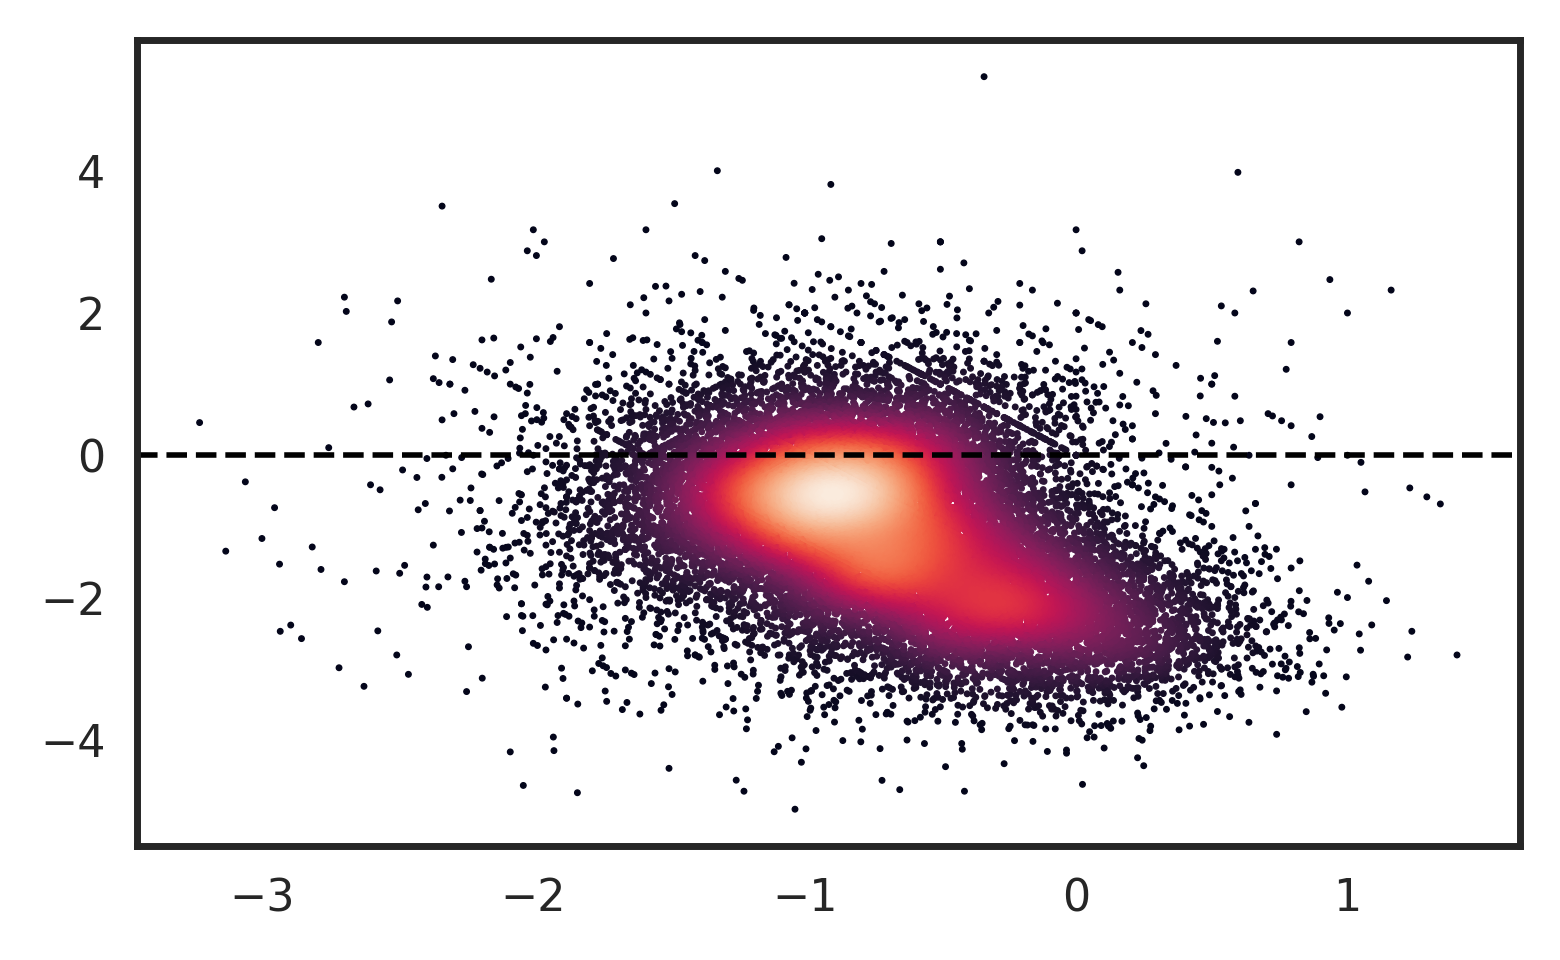

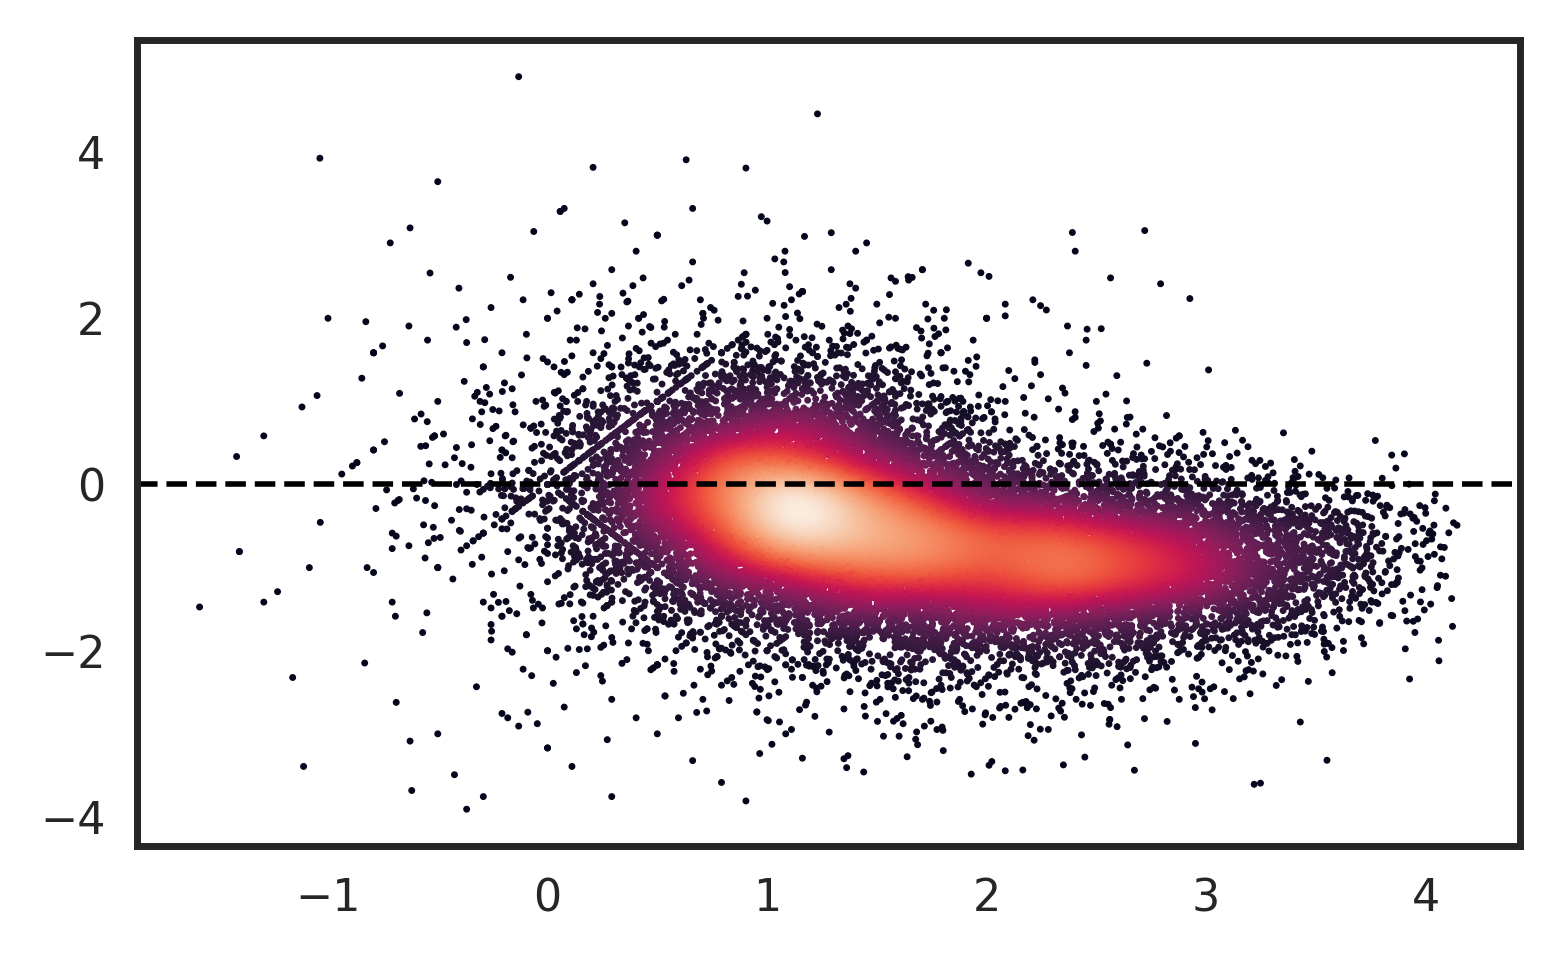

In [18]:
lfc_ESC_K79 = rel.MA_samp(cT_inp, ["mESC_DMSO", "mESC_EPZ"])[1]
lfc_NPC_K79 = rel.MA_samp(cT_inp, ["NPC48h_DMSO", "NPC48h_EPZ"])[1]

In [56]:
lfc_ESC_ =  lfc_ESC_K79.to_frame().merge(exp_ESC[["log2FoldChange","padj"]],how='right',left_index=True, right_index=True)
lfc_ESC_.columns = ["H3K79me2_LFC","Expr_LFC","padj"]
lfc_ESC_ = lfc_ESC_.merge(counts_sumRep[["mESC_DMSO"]], how='right', left_index=True, right_index=True)
lfc_ESC_ = lfc_ESC_.merge(tr[["length"]], how='right', left_index=True, right_index=True)
lfc_ESC_["H3K79me2_dens"] = (lfc_ESC_["mESC_DMSO"].values / (lfc_ESC_["length"].values / 1000))
lfc_ESC_.dropna(inplace=True)
lfc_ESC_


lfc_NPC_ =  lfc_NPC_K79.to_frame().merge(exp_NPC[["log2FoldChange","padj"]],how='right',left_index=True, right_index=True)
lfc_NPC_.columns = ["H3K79me2_LFC","Expr_LFC","padj"]
lfc_NPC_ = lfc_NPC_.merge(counts_sumRep[["NPC48h_DMSO"]], how='right', left_index=True, right_index=True)
lfc_NPC_ = lfc_NPC_.merge(tr[["length"]], how='right', left_index=True, right_index=True)
lfc_NPC_["H3K79me2_dens"] = (lfc_NPC_["NPC48h_DMSO"].values / (lfc_NPC_["length"].values / 1000))
lfc_NPC_.dropna(inplace=True)
lfc_NPC_

,H3K79me2_LFC,Expr_LFC,padj,NPC48h_DMSO,length,H3K79me2_dens
ENSMUSG00000000001.4,-1.508531,-0.043634,0.627445,523.0,3000.0,174.333333
ENSMUSG00000000028.15,-0.637346,-0.058827,0.470552,232.0,3000.0,77.333333
ENSMUSG00000000037.16,-1.185032,-0.002116,0.981240,36.0,3000.0,12.000000
ENSMUSG00000000056.7,-1.505374,-0.025571,0.807039,268.0,3000.0,89.333333
ENSMUSG00000000078.7,-1.357681,-0.031763,0.759484,761.0,3000.0,253.666667
...,...,...,...,...,...,...
ENSMUSG00000116165.1,-1.594838,0.067264,0.440457,356.0,3000.0,118.666667
ENSMUSG00000116358.1,-2.469411,0.004024,0.957941,1261.0,3000.0,420.333333
ENSMUSG00000116564.1,-0.648219,-0.052737,0.564394,554.0,3000.0,184.666667
ENSMUSG00000116594.1,-0.707218,0.004723,0.969173,210.0,3000.0,70.000000


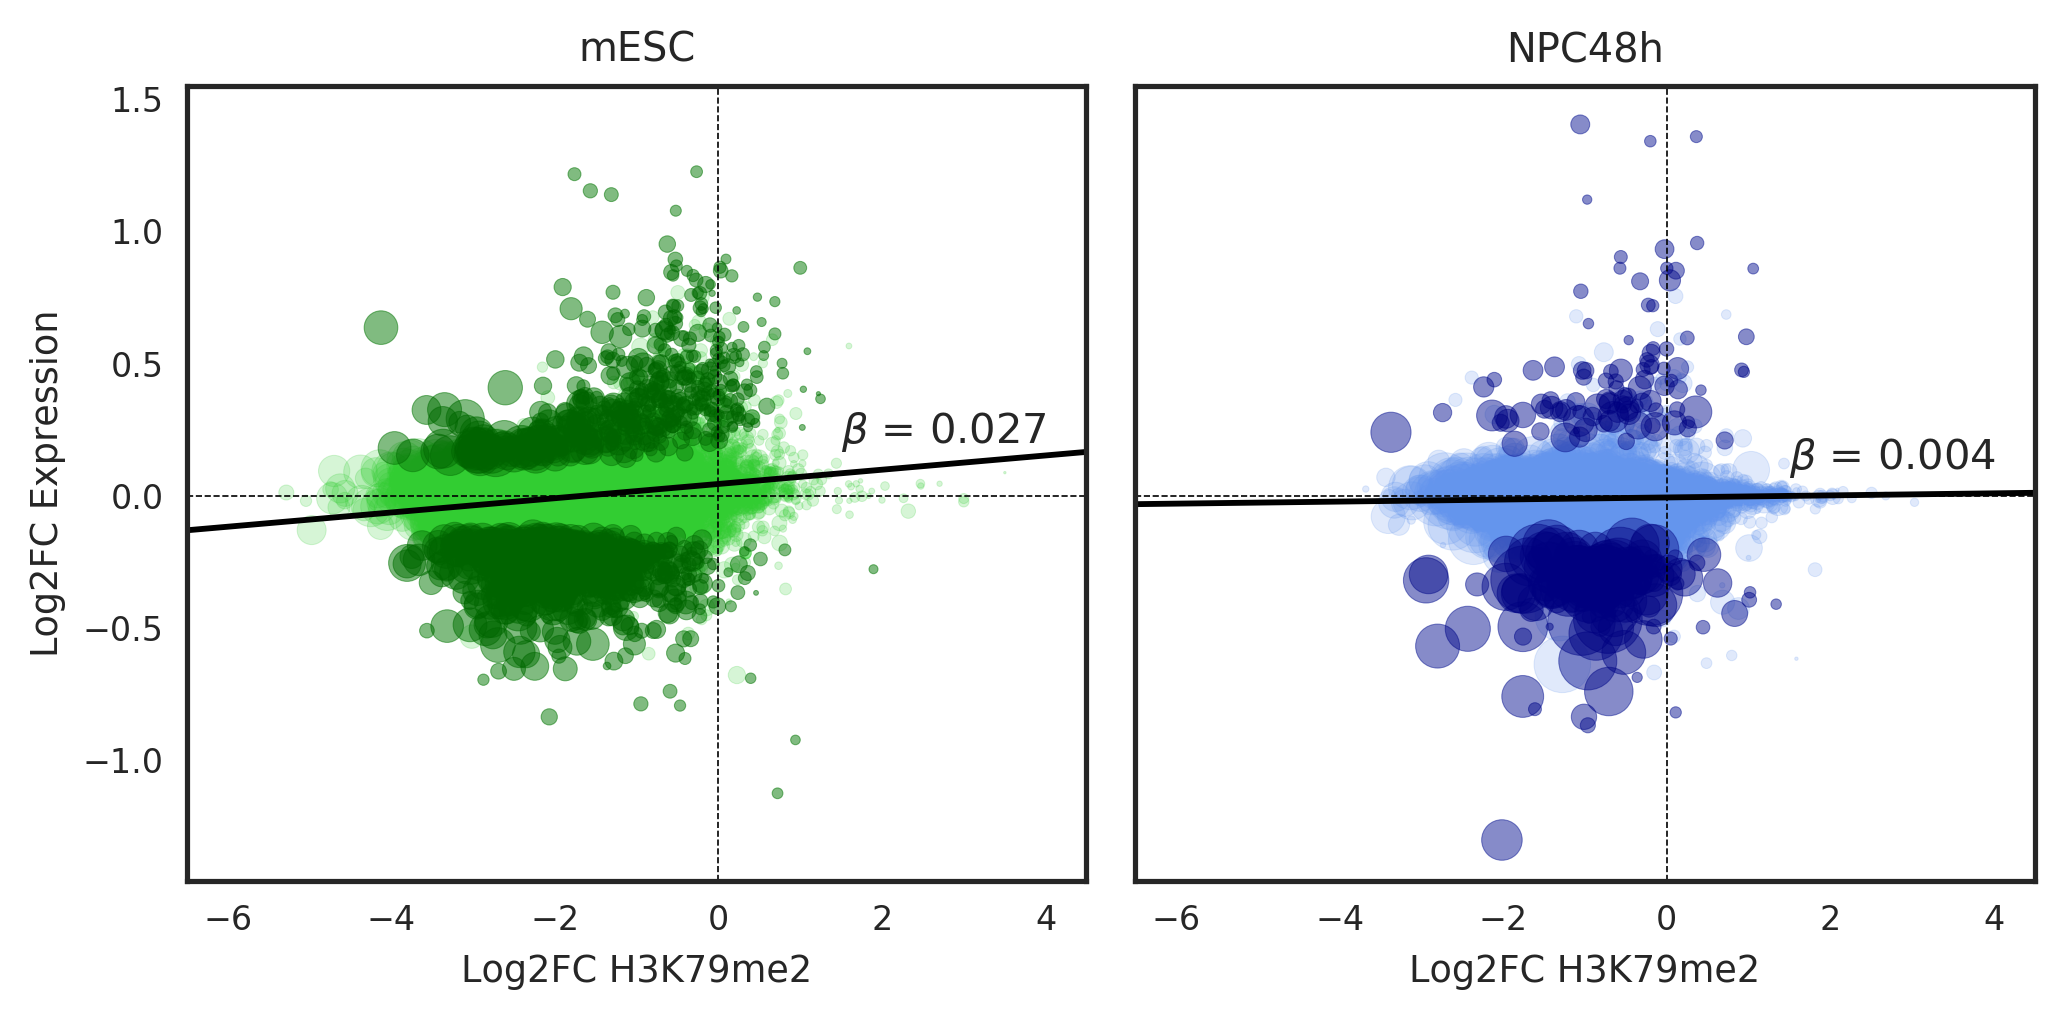

In [61]:
# plt.scatter(lfc_npc.H3K79me2_loss, lfc_npc.log2FoldChange)
fig,ax = plt.subplots(1,2,dpi=300,figsize=(7,3.5), sharey=True, sharex=True)
ax[0].set_xlim(-6.5,4.5)
rang = np.arange(-6.5,4.5+1)

X = lfc_ESC_.H3K79me2_LFC.to_frame()
y = lfc_ESC_.Expr_LFC
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_

ax[0].scatter(lfc_ESC_.H3K79me2_LFC, lfc_ESC_.Expr_LFC, s=lfc_ESC_.H3K79me2_dens.values/2, color='limegreen', alpha=0.2)
ax[0].scatter(lfc_ESC_.H3K79me2_LFC.loc[lfc_ESC_.padj<0.01], lfc_ESC_.Expr_LFC.loc[lfc_ESC_.padj<0.01], s=lfc_ESC_.H3K79me2_dens.loc[lfc_ESC_.padj<0.01].values/2,color='darkgreen',alpha=0.4)
# sns.regplot(lfc_es.H3K79me2_loss, lfc_es.log2FoldChange, ax=ax[0], color='k',scatter=None)
ax[0].plot(rang, rang*reg.coef_ + reg.intercept_, color='k')
ax[0].set_title("mESC")
ax[0].axvline(0,linewidth=0.4,linestyle='--', color='k')
ax[0].axhline(0,linewidth=0.4,linestyle='--', color='k')
ax[0].set_ylabel("Log2FC Expression")
ax[0].set_xlabel("Log2FC H3K79me2")
ax[0].annotate(r'$\beta$'+ " = {}".format(np.round(reg.coef_[0],3)), [1.5,2*reg.coef_ + reg.intercept_+0.1])


X = lfc_NPC_.H3K79me2_LFC.to_frame()
y = lfc_NPC_.Expr_LFC
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_

ax[1].scatter(lfc_NPC_.H3K79me2_LFC, lfc_NPC_.Expr_LFC, s=lfc_NPC_.H3K79me2_dens.values/2, c="cornflowerblue", alpha=0.2)
ax[1].scatter(lfc_NPC_.H3K79me2_LFC.loc[lfc_NPC_.padj<0.05], lfc_NPC_.Expr_LFC.loc[lfc_NPC_.padj<0.05], s=lfc_NPC_.H3K79me2_dens.loc[lfc_NPC_.padj<0.05].values/2, color='navy',alpha=0.4)
# sns.regplot(lfc_npc.H3K79me2_loss, lfc_npc.log2FoldChange, ax=ax[1], color="k", scatter=None)
ax[1].plot(rang, rang*reg.coef_ + reg.intercept_, color='k')

ax[1].set_title("NPC48h")
ax[1].axvline(0,linewidth=0.4,linestyle='--', color='k')
ax[1].axhline(0,linewidth=0.4,linestyle='--', color='k')
ax[1].set_ylabel("")
ax[1].set_xlabel("Log2FC H3K79me2")
ax[1].annotate(r'$\beta$'+ " = {}".format(np.round(reg.coef_[0],3)), [1.5,2*reg.coef_ + reg.intercept_+0.1])


plt.tight_layout()

plt.savefig("../FIGURES/H3K79me2LOSS_vs_expressionChange.png")

In [ ]:
lfc_ESC_K79 = rel.MA_samp(cT_inp, ["mESC_DMSO", "mESC_EPZ"])[1]



In [52]:
tr

,chr,start,end,gene_ID,score,strand,gene_name,length,coord_ID
gene_ID,,,,,,,,,
ENSMUSG00000100249.1,X,3076875,3078817,ENSMUSG00000100249.1,.,+,WI1-2837F4.1,1942.0,X_3076875_3078817
ENSMUSG00000096426.2,X,3193887,3195827,ENSMUSG00000096426.2,.,-,WI1-548K12.1,1940.0,X_3193887_3195827
ENSMUSG00000094558.1,X,3441731,3443690,ENSMUSG00000094558.1,.,-,RP23-14B5.3,1959.0,X_3441731_3443690
ENSMUSG00000094876.1,X,3700233,3702192,ENSMUSG00000094876.1,.,+,RP23-136N4.2,1959.0,X_3700233_3702192
ENSMUSG00000095716.1,X,3750934,3752885,ENSMUSG00000095716.1,.,-,RP23-136N4.4,1951.0,X_3750934_3752885
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100608.1,Y,89742532,89745532,ENSMUSG00000100608.1,.,-,CH36-8M21.1,3000.0,Y_89742532_89745532
ENSMUSG00000096178.7,Y,90401248,90404248,ENSMUSG00000096178.7,.,+,RP24-549P13.1,3000.0,Y_90401248_90404248
ENSMUSG00000095366.1,Y,90754513,90754821,ENSMUSG00000095366.1,.,-,Gm21860,308.0,Y_90754513_90754821


['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 'X',
 'Y']